# PM2.5 prediction

### Import libraries

In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from scipy.stats import stats
seed(1)
from fs import methods as m
from fs import model as ml
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Data Import

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/me

---------grid_0_1_0418_0425_2021.gpkg---------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


2022-05-23 17:26:56.706552: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-23 17:26:56.707262: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


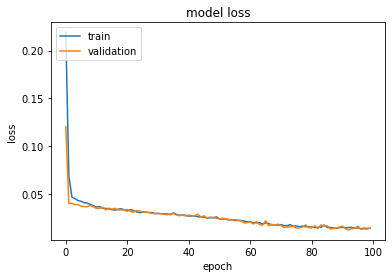

Values predicted:  [[22.611454 ]
 [18.017939 ]
 [22.286665 ]
 [17.014172 ]
 [19.008108 ]
 [19.697155 ]
 [18.271164 ]
 [19.705038 ]
 [23.040012 ]
 [17.575563 ]
 [15.775391 ]
 [21.328438 ]
 [19.905188 ]
 [20.002953 ]
 [19.725452 ]
 [23.144094 ]
 [19.589504 ]
 [13.26072  ]
 [18.14015  ]
 [14.415099 ]
 [18.33026  ]
 [20.912613 ]
 [20.497995 ]
 [22.386286 ]
 [21.416817 ]
 [19.75057  ]
 [18.739454 ]
 [18.59124  ]
 [18.375677 ]
 [19.54092  ]
 [20.99129  ]
 [22.719513 ]
 [19.12688  ]
 [18.067894 ]
 [19.450588 ]
 [18.25618  ]
 [16.202435 ]
 [19.029686 ]
 [19.921978 ]
 [15.283724 ]
 [16.970636 ]
 [18.338444 ]
 [18.555027 ]
 [14.509414 ]
 [18.131647 ]
 [19.740683 ]
 [19.975613 ]
 [15.623108 ]
 [20.715103 ]
 [20.048855 ]
 [20.867851 ]
 [17.87053  ]
 [14.9945755]
 [20.192314 ]]
Values :  [[23.77451484]
 [18.18160347]
 [20.30819625]
 [17.10270714]
 [18.83298897]
 [15.9683037 ]
 [18.97437529]
 [19.78888917]
 [21.1561387 ]
 [17.69204367]
 [15.12911068]
 [22.55729673]
 [20.12699447]
 [17.43185004]
 [15

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.188627105196555
Mean Squared Error:  2.357297699057838
Mean (Y-test): 18.212016739339283
Mean (Y-predicted):  18.75009430001635
R2 score:  0.6655961892246729


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/me

---------grid_0_1_0903_0910_2021.gpkg---------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


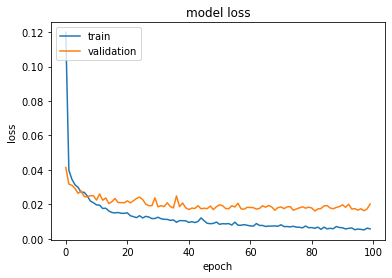

Values predicted:  [[19.469677 ]
 [13.065853 ]
 [22.359251 ]
 [13.047363 ]
 [12.420131 ]
 [16.36274  ]
 [13.066798 ]
 [15.000887 ]
 [11.817306 ]
 [15.138659 ]
 [16.021389 ]
 [15.79881  ]
 [14.309165 ]
 [12.950096 ]
 [16.925112 ]
 [21.840525 ]
 [17.381138 ]
 [17.899185 ]
 [13.026744 ]
 [12.629559 ]
 [16.685976 ]
 [12.380735 ]
 [11.510016 ]
 [12.771536 ]
 [13.167185 ]
 [17.813978 ]
 [16.360348 ]
 [16.01665  ]
 [17.72271  ]
 [12.297738 ]
 [14.199292 ]
 [19.19061  ]
 [13.795117 ]
 [13.901921 ]
 [17.679127 ]
 [11.357983 ]
 [11.981928 ]
 [14.8677435]
 [17.53047  ]
 [12.478624 ]
 [15.309495 ]
 [17.843065 ]
 [12.422159 ]
 [13.218883 ]
 [12.421575 ]
 [11.747394 ]
 [13.363444 ]
 [17.035885 ]
 [15.462148 ]
 [14.565287 ]
 [14.762757 ]
 [17.030714 ]
 [13.352973 ]
 [19.04383  ]]
Values :  [[19.48839036]
 [13.48024522]
 [24.43408639]
 [13.12929398]
 [11.209024  ]
 [16.31562549]
 [13.28140952]
 [15.43671202]
 [10.5209441 ]
 [17.095317  ]
 [17.13729039]
 [15.93881176]
 [14.26118349]
 [13.61696971]
 [19

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.2493461880010501
Mean Squared Error:  2.5364206656931847
Mean (Y-test): 15.444371502479726
Mean (Y-predicted):  15.612163016670628
R2 score:  0.7662211531237532


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/me

---------grid_0_1_1007_1017_2021.gpkg---------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 8         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


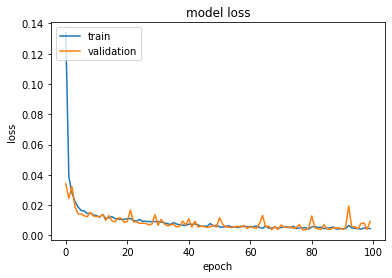

Values predicted:  [[17.590113 ]
 [17.257732 ]
 [14.628629 ]
 [20.40744  ]
 [24.035437 ]
 [20.682516 ]
 [23.426914 ]
 [12.9932   ]
 [17.03102  ]
 [17.05368  ]
 [18.976707 ]
 [21.449203 ]
 [16.094254 ]
 [11.249987 ]
 [24.340677 ]
 [22.282785 ]
 [14.691236 ]
 [17.558971 ]
 [15.382679 ]
 [23.675695 ]
 [15.536139 ]
 [14.799054 ]
 [15.630465 ]
 [11.705783 ]
 [24.83555  ]
 [14.122284 ]
 [21.981127 ]
 [12.8613615]
 [13.184188 ]
 [21.647518 ]
 [23.906727 ]
 [14.408379 ]
 [15.243708 ]
 [14.875753 ]
 [10.64385  ]
 [10.970879 ]
 [16.028248 ]
 [16.521599 ]
 [17.814993 ]
 [11.423879 ]
 [13.750367 ]
 [11.742897 ]
 [15.153484 ]
 [18.587172 ]
 [19.187477 ]
 [14.920248 ]
 [24.683907 ]
 [20.433752 ]
 [19.039648 ]
 [23.306314 ]
 [16.919144 ]
 [24.340761 ]
 [13.152599 ]
 [18.66029  ]]
Values :  [[16.83012585]
 [17.33017171]
 [15.24995015]
 [23.11855415]
 [24.01534305]
 [21.45439474]
 [26.44425747]
 [14.97053962]
 [15.74134958]
 [19.6794674 ]
 [19.66844158]
 [21.7950776 ]
 [15.44439399]
 [11.05030324]
 [24

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.1705215055982763
Mean Squared Error:  2.4804955198620653
Mean (Y-test): 18.04118755542192
Mean (Y-predicted):  17.304748660639714
R2 score:  0.877150336596106


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/me

---------grid_0_1_0717_0724_2021.gpkg---------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


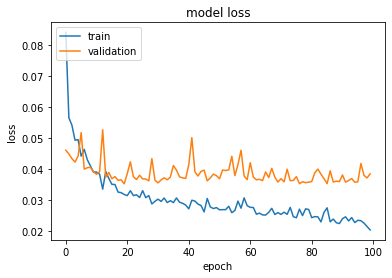

Values predicted:  [[15.303627 ]
 [15.466303 ]
 [13.016586 ]
 [11.134223 ]
 [12.375157 ]
 [12.623147 ]
 [14.421703 ]
 [14.488397 ]
 [12.135642 ]
 [10.441657 ]
 [12.018385 ]
 [12.563009 ]
 [16.012592 ]
 [14.063858 ]
 [12.301295 ]
 [10.389758 ]
 [11.433867 ]
 [12.425856 ]
 [13.3807535]
 [12.1491   ]
 [12.771476 ]
 [10.454256 ]
 [12.07729  ]
 [13.474182 ]
 [12.092259 ]
 [13.374002 ]
 [11.8684   ]
 [13.074584 ]
 [11.968308 ]
 [12.215465 ]
 [12.311539 ]
 [14.079517 ]
 [12.663075 ]
 [12.113222 ]
 [12.654824 ]
 [11.876402 ]
 [12.200139 ]
 [11.986059 ]
 [12.2688   ]
 [13.0139265]
 [10.92724  ]
 [12.997586 ]
 [14.155158 ]
 [12.042397 ]
 [14.699545 ]
 [10.786075 ]
 [12.884821 ]
 [12.09612  ]
 [12.402504 ]
 [12.615167 ]
 [12.826135 ]
 [12.779377 ]
 [12.741013 ]
 [15.523666 ]]
Values :  [[14.41679057]
 [14.13675726]
 [14.06678223]
 [12.23161279]
 [13.35796078]
 [11.35341479]
 [14.64397603]
 [14.0427941 ]
 [12.60604687]
 [10.20311679]
 [12.7852054 ]
 [14.06662131]
 [14.71371341]
 [12.96398017]
 [14

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  0.9584448457788374
Mean Squared Error:  1.4578321916650798
Mean (Y-test): 12.880205360507937
Mean (Y-predicted):  12.46929190574436
R2 score:  0.2895758507598003


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/me

---------grid_0_1_0324_0331_2021.gpkg---------
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


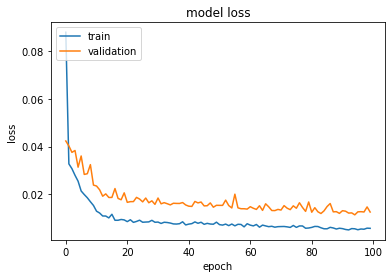

Values predicted:  [[31.418959]
 [25.38419 ]
 [35.25502 ]
 [23.410294]
 [24.587524]
 [27.95014 ]
 [26.195738]
 [25.438843]
 [26.371887]
 [27.288265]
 [27.71758 ]
 [36.045334]
 [35.152782]
 [27.642195]
 [36.35828 ]
 [26.033678]
 [27.661913]
 [42.189507]
 [28.923653]
 [39.31212 ]
 [27.779648]
 [33.035625]
 [32.260784]
 [30.887814]
 [35.18293 ]
 [34.17959 ]
 [25.971392]
 [31.208294]
 [36.142227]
 [28.32661 ]
 [27.476418]
 [32.745365]
 [26.650835]
 [31.69784 ]
 [22.93339 ]
 [28.279793]
 [26.170412]
 [27.534481]
 [25.016275]
 [30.996841]
 [24.289482]
 [25.508642]
 [24.823366]
 [36.191418]
 [29.167213]
 [33.493793]
 [29.52998 ]
 [23.86914 ]
 [25.968477]
 [34.704735]
 [36.4126  ]
 [29.254137]
 [26.167213]
 [25.47543 ]]
Values :  [[29.42382081]
 [26.77829   ]
 [36.79032711]
 [28.25568814]
 [28.00805988]
 [26.30661897]
 [23.23971302]
 [25.91806342]
 [24.84431857]
 [28.65555018]
 [27.08652179]
 [33.95063902]
 [35.17436908]
 [27.169378  ]
 [38.26921113]
 [24.46832271]
 [26.5970461 ]
 [42.4983998 

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nA = np.array(list(points.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.8108607090126585
Mean Squared Error:  5.395863119639419
Mean (Y-test): 30.328945805351495
Mean (Y-predicted):  29.948133923591822
R2 score:  0.8172783083170008


In [2]:
RESOLUTION = '0_1'
TARGET = 'pm25_st'
KNN = True
NUMBER_OF_PARAMS = 12
NUMBER_OF_COVARIATES = NUMBER_OF_PARAMS + 2


geopackages = os.listdir('grids_'+RESOLUTION)


results1 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])
results2 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])



for index, grid in enumerate(geopackages):
    data = gpd.read_file('grids_'+RESOLUTION+'/'+ grid)

    if KNN:
        data = m.increase_data(gpd.read_file('grids_'+RESOLUTION+'/'+ grid), 'pm25_st', 5)

    coll = pd.DataFrame()
    coll['pm25_st'] = data['pm25_st']
    coll['pm25_cams'] = data['pm25_cams']
    coll = coll.dropna(axis=0)

    #print('Mean Absolute Error: ',mean_absolute_error(coll['pm25_cams'], coll['pm25_st'], ))
    #print('Mean Squared Error: ',mean_squared_error(coll['pm25_cams'], coll['pm25_st']))
    #print('R2 score: ',r2_score(coll['pm25_cams'], coll['pm25_st']))

    points_st = gpd.read_file('arpa_stations/pm25_st.gpkg')

    data = m.add_buffer(points_st, data, data, 10)


    data = data[~data[TARGET].isnull()]
    data = data.dropna(axis=1)


    data.pop('geometry')
    data.pop('bottom')
    data.pop('top')
    data.pop('left')
    data.pop('right')


    labels = pd.read_csv('features_' +RESOLUTION +'/'+grid[:-5]+'.csv')['Features']
    #labels = pd.read_csv('fs.csv')['Features']

    labels = ml.remove_int_values(labels.tolist())
    #data.pop('pm25_cams')
    #labels.remove('pm25_cams')


    #read variables which are not null
    score_results = pd.DataFrame()

    #Store dataset in x and y variables
    X = pd.DataFrame(data=data, columns=labels ).dropna(axis = 1)
    X = X.iloc[:, :NUMBER_OF_PARAMS]
    X['lat_cen'] = data['lat_cen']
    X['lng_cen'] = data['lng_cen']

    Y = pd.DataFrame(data=data, columns=[TARGET] )
    Y = Y.values.ravel()


    #NUMBER_OF_COVARIATES = X.shape[1]
    y1 = np.array(Y)

    X_train, X_val, y_train, y_val = train_test_split(X, y1, test_size=0.30)

    y_train=np.reshape(y_train, (-1,1))
    y_val=np.reshape(y_val, (-1,1))

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    scaler_x.fit(X_train)
    xtrain_scale=scaler_x.transform(X_train)
    scaler_x.fit(X_val)
    xval_scale=scaler_x.transform(X_val)

    scaler_y.fit(y_train)
    ytrain_scale=scaler_y.transform(y_train)
    scaler_y.fit(y_val)
    yval_scale=scaler_y.transform(y_val)


    print('---------'+ grid +'---------')

    model = Sequential()
    model.add(Dense(NUMBER_OF_COVARIATES, input_dim=NUMBER_OF_COVARIATES, kernel_initializer='normal', activation='relu'))
    model.add(Dense(NUMBER_OF_COVARIATES/2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()

    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])



    history=model.fit(xtrain_scale, ytrain_scale, epochs=100, batch_size=1, verbose=0, validation_split=0.30)
    predictions = model.predict(xval_scale)

    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.plot(history.history['accuracy'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    predictions = scaler_y.inverse_transform(predictions)


    results1.loc[index]= [round(mean_absolute_error(y_val, predictions),3), round(mean_squared_error(y_val, predictions),3), round(np.mean(y_val), 3), round(np.mean(predictions), 3), round(r2_score(y_val, predictions), 3)]
    results1.rename(index={index: grid}, inplace=True)





    print('Values predicted: ', predictions)
    print('Values : ', scaler_y.inverse_transform(yval_scale))
    print('---------VALIDATION WITH ARPA (TEST_SET)---------')

    print('Mean Absolute Error: ',mean_absolute_error(y_val, predictions))
    print('Mean Squared Error: ',mean_squared_error(y_val, predictions))
    print('Mean (Y-test):',np.mean(y_val))
    print('Mean (Y-predicted): ',np.mean(predictions))
    print('R2 score: ',r2_score(y_val, predictions))

    #%%

    data_new = m.increase_data(gpd.read_file('grids_'+RESOLUTION+'/'+ grid), 'pm25_st', 5)
    data_new = data_new[~data_new[TARGET].isnull()]
    pm25_obs = data_new['pm25_st']
    X_new = pd.DataFrame(data=data_new, columns=labels).dropna(axis=1)
    X_new = X_new.iloc[:, :NUMBER_OF_PARAMS]

    X_new['lat_cen'] = data_new['lat_cen']
    X_new['lng_cen'] = data_new['lng_cen']
    scaler_x = MinMaxScaler()
    scaler_x.fit(X_new)
    X_new_scale=scaler_x.transform(X_new)




    predictions_pm25 = model.predict(X_new_scale,  batch_size=1)
    predictions_pm25 = pd.Series(np.array(scaler_y.inverse_transform(predictions_pm25)).reshape((-1,)))
    e = pd.DataFrame()

    e['predictions_pm25'] = list(predictions_pm25)
    e['pm25_obs'] = list(pm25_obs)
    e = e.dropna(axis=0)
    print('---------VALIDATION WITH ARPA (ALL)---------')
    print('Mean Absolute Error: ',mean_absolute_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean Squared Error: ',mean_squared_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean (Y-test):',np.mean(e['pm25_obs']))
    print('Mean (Y-predicted): ',np.mean(e['predictions_pm25']))
    print('R2 score: ',r2_score(e['pm25_obs'], e['predictions_pm25']))

    results2.loc[index]= [round(mean_absolute_error(e['pm25_obs'], e['predictions_pm25']),3), round(mean_squared_error(e['pm25_obs'], e['predictions_pm25']),3), round(np.mean(e['pm25_obs']),3), round(np.mean(e['predictions_pm25']),3), round(r2_score(e['pm25_obs'], e['predictions_pm25']),3)]
    results2.rename(index={index: grid}, inplace=True)

results1 = results1.T
results2 = results2.T

results1.to_excel('test/keras1'+RESOLUTION+'.xlsx')
results2.to_excel('test/keras2'+RESOLUTION+'.xlsx')
